In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.cross_validation import train_test_split


In [45]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationalnum','marital-status', 'occupation', 'relationship', 'race', 'gender','capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry','income']

train = pd.read_csv('adult.csv', header=None, names = columns)
test = pd.read_csv('adult_test.csv',  header=None, names = columns)

adult = pd.concat([train,test])

len(adult)

48842

In [46]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educationalnum',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capitalgain', 'capitalloss', 'hoursperweek', 'nativecountry',
       'income'],
      dtype='object')

In [47]:
adult['nativecountry'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [48]:
print("Before dropping size = " , len(adult))

adult = adult[adult.occupation.str.strip() != '?']
adult = adult[adult.workclass.str.strip() != '?']
adult = adult[adult.nativecountry.str.strip() != '?']

print("After removing rows with value ?" , len(adult))


Before dropping size =  48842
After removing rows with value ? 45222


In [49]:
def func(x):
    if(x == " <=50K" or x == " <=50K."):
        return 0
    elif(x == " >50K" or x == ' >50K.'):
        return 1
adult['income'] = adult['income'].apply(func)

y = adult['income']
del adult['income']

In [50]:
adult.head()

,age,workclass,fnlwgt,education,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


#### Education and educationnum both represent the level of education. So we can remove one of them.
#### fnlwgt – The number of people the census takers believe that observation represents. Remove this variable.

In [51]:
del adult['education']
del adult['fnlwgt']

In [52]:
adult.head()

,age,workclass,educationalnum,marital-status,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [57]:

# Train - Test split# Train  
adult_X_train, adult_X_test, adult_y_train, adult_y_test = train_test_split(adult, y, test_size  = 0.3)

print("Training dataset size: ", len(adult_X_train))
print("Testing dataset size: ", len(adult_X_test))
print("Training label dataset size: ", len(adult_y_train))
print("Testing label dataset size: ", len(adult_y_test))

Training dataset size:  31655
Testing dataset size:  13567
Training label dataset size:  31655
Testing label dataset size:  13567


### Plot histogram for adult dataset

In [59]:
len(y[y==0])


34014

0.7521560302507629


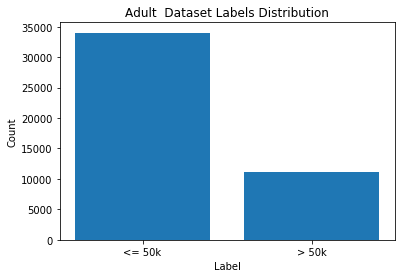

In [61]:
adult_labels= ["<= 50k", "> 50k"]
count_0 = len(y[y==0])
count_1 = len(y[y==1])
adult_label_values=[count_0, count_1]
print(count_0/(count_0+count_1))


plt.bar(adult_labels, adult_label_values)
plt.title('Adult  Dataset Labels Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

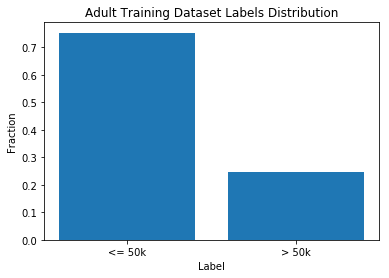

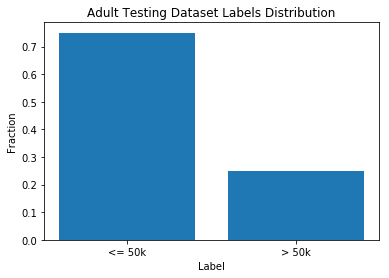

In [62]:
adult_labels= ["<= 50k", "> 50k"]
count_0 = len(adult_y_train[adult_y_train==0])
count_1 = len(adult_y_train[adult_y_train==1])
sum_trn= count_0 + count_1
adult_train_values=[count_0/sum_trn, count_1/sum_trn]


plt.bar(adult_labels, adult_train_values)
plt.title('Adult Training Dataset Labels Distribution')
plt.xlabel('Label')
plt.ylabel('Fraction')
plt.show()


count_0 = len(adult_y_test[adult_y_test==0])
count_1 = len(adult_y_test[adult_y_test==1])
sum= count_0 + count_1
adult_test_values=[count_0/sum, count_1/sum]


plt.bar(adult_labels, adult_test_values)
plt.title('Adult Testing Dataset Labels Distribution')
plt.xlabel('Label')
plt.ylabel('Fraction')
plt.show()



In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
adult_X_train = min_max_scaler.fit_transform(adult_X_train)

In [16]:
adult_X_test = min_max_scaler.fit_transform(adult_X_test)

### Load bank dataset

In [72]:
bank_data = pd.read_csv('bank-full.csv', delimiter = ";", header="infer")
print(len(bank_data))
print(bank_data.columns)
print(bank_data.shape)


45211
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
(45211, 17)


In [68]:
bank_data = pd.read_csv('bank-full.csv', delimiter = ";", header="infer")
print(len(bank_data))

bank_data = pd.get_dummies(bank_data, columns=['job','marital',
                                         'education','default',
                                         'housing','loan',
                                         'contact','month',
                                         'poutcome'])

bank_data.y.replace(('yes','no'), (1,0), inplace = True)

y = bank_data['y']
del bank_data['y']



45211


In [69]:
bank_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [64]:
# Train - Test split# Train  
bank_X_train, bank_X_test, bank_y_train, bank_y_test = train_test_split(bank_data, y, test_size  = 0.3)

print("Bank Training dataset size: ", len(bank_X_train))
print("Bank Testing dataset size: ", len(bank_X_test))
print("Bank Training label dataset size: ", len(bank_y_train))
print("Bank Testing label dataset size: ", len(bank_y_test))

Bank Training dataset size:  31647
Bank Testing dataset size:  13564
Bank Training label dataset size:  31647
Bank Testing label dataset size:  13564


### Bank dataset label histograms

In [65]:
y.unique()

array([0, 1])

0.8830151954170445


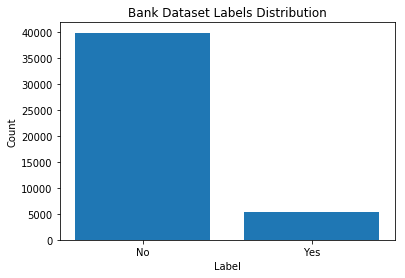

In [67]:
bank_labels= ["No", "Yes"]
count_0 = len(y[y==0])
count_1 = len(y[y==1])
bank_label_values=[count_0, count_1]
print(count_0/(count_1 + count_0))


plt.bar(bank_labels, bank_label_values)
plt.title('Bank Dataset Labels Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

training ct 0 =  27991  training ct 1 =  3656


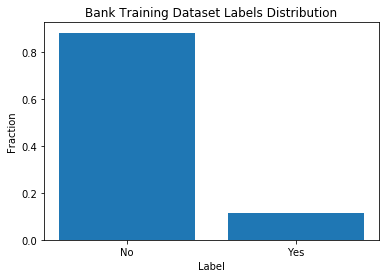

test ct 0 =  11931  test ct 1 =  1633


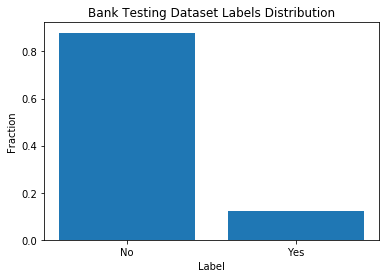

In [42]:

count_trn_0 = len(bank_y_train[bank_y_train==0])
count_trn_1 = len(bank_y_train[bank_y_train==1])
sum_trn= count_trn_0 + count_trn_1
print("training ct 0 = ", count_trn_0, " training ct 1 = ", count_trn_1 )
bank_train_values=[count_trn_0/sum_trn, count_trn_1/sum_trn]


plt.bar(bank_labels, bank_train_values)
plt.title('Bank Training Dataset Labels Distribution')
plt.xlabel('Label')
plt.ylabel('Fraction')
plt.show()


count_0 = len(bank_y_test[bank_y_test==0]) 
count_1 = len(bank_y_test[bank_y_test==1]) 
sum= count_0 + count_1
bank_test_values=[count_0/sum, count_1/sum]
print("test ct 0 = ", count_0, " test ct 1 = ", count_1 )




plt.bar(bank_labels, bank_test_values)
plt.title('Bank Testing Dataset Labels Distribution')
plt.xlabel('Label')
plt.ylabel('Fraction')
plt.show()



### Create accuracy plots for both datasets

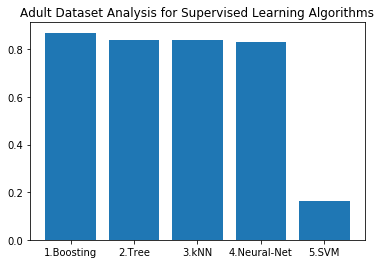

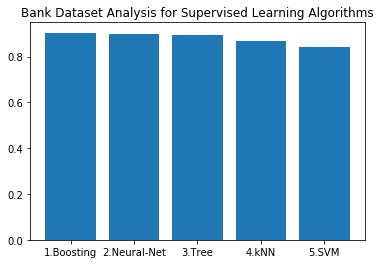

In [92]:
#algos = [5, 1,2,3,4]
adult_algos = ["1.Boosting", "2.Tree", "3.kNN", "4.Neural-Net", "5.SVM"]
fin_adult = [0.87, 0.84, 0.84, 0.83, 0.1644]

bank_algos = ["1.Boosting", "2.Neural-Net", "3.Tree", "4.kNN", "5.SVM"]
fin_bank = [0.904, 0.90, 0.8943, 0.87, 0.8405]

plt.bar(adult_algos, fin_adult)
plt.title('Adult Dataset Analysis for Supervised Learning Algorithms')
plt.show()


plt.bar(bank_algos, fin_bank)
plt.title('Bank Dataset Analysis for Supervised Learning Algorithms')
plt.show()
